Tomas lemus

PROBLEM STATEMENT FOR THE UNSUPERVISED LEARNING SECTION
OF THE MACHINE LEARNING PART OF THE COURSE
1. You must load the machine learning dataset that you already used in the Introduction
section. This time the class labels are not going to be used, since we want the clustering
algorithms to discover clusters in the data without any prior information about the
classes.
2. Run K-means on the dataset with K ranging from 2 to 10 clusters. Then plot the
resulting Mean Squared Error for each considered value of K. Please see:
http://scikit-learn.org/stable/tutorial/statistical_inference/unsupervised_learning.html
3. Run mean shift clustering with different bandwidths. You will have to find out a
relevant range of possible bandwidths. Then plot the obtained Mean Squared Error and
the number of discovered clusters for the considered bandwidths. Please see:
http://scikit-learn.org/stable/modules/generated/sklearn.cluster.MeanShift.html
Note: After you finish your work, you must download the Jupyter Notebook in PDF
format (the menu option is File -> Print -> Save as PDF). Then you must put the .pdf
and .ipynb files into a .zip archive file, and submit the .zip file to the virtual campus
activity

In [1]:
from sklearn.metrics import mean_squared_error, silhouette_score

In [13]:
from sklearn import cluster
from matplotlib import pyplot as plt

#1. Load Dataset

In [3]:
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_svmlight_file
import numpy as np

drive.mount('/content/drive') 

Mounted at /content/drive


In [4]:
X, Y = load_svmlight_file("/content/drive/MyDrive/UMA/CIENCIADATOSl/Dataset/wine.scale")

### 2. k-means & Mean Squared Error for each cluster

In [11]:
 cls=np.arange(11)
listclst=list()
a=1
for i in cls:
  if i>a:
    k_means = cluster.KMeans(n_clusters=i)
    k_means.fit(X)
    i3=k_means.inertia_
    listclst.append(i3)
    print("Mean Squared Error for "+ str(i) + " clusters is :",i3)



Mean Squared Error for 2 clusters is : 258.1506682172302
Mean Squared Error for 3 clusters is : 195.8161418836718
Mean Squared Error for 4 clusters is : 179.07732502706475
Mean Squared Error for 5 clusters is : 169.23321943084525
Mean Squared Error for 6 clusters is : 161.89076750748663
Mean Squared Error for 7 clusters is : 150.71926393424323
Mean Squared Error for 8 clusters is : 144.2532170679246
Mean Squared Error for 9 clusters is : 139.02780513397587
Mean Squared Error for 10 clusters is : 133.41102914420784


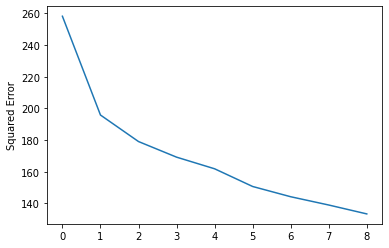

In [15]:
plt.figure()
plt.plot(listclst)
plt.ylabel('Squared Error')
plt.show()

### 3.Running mean shift clustering with different bandwidths.

In [6]:
bandwidth = cluster.estimate_bandwidth(X.toarray())
print("Estimate bandwidth: ",bandwidth)

Estimate bandwidth:  1.6342764436921735


Testing with differents bandwidth and observing their numbers of clusters

In [7]:
clustering = cluster.MeanShift().fit(X.toarray())
clustering.cluster_centers_.size

13

In [8]:
clustering.set_params(bandwidth=bandwidth)
clustering.fit(X.toarray())
clustering.cluster_centers_.size

13

In [9]:
clustering.set_params(bandwidth=5)
clustering.fit(X.toarray())
clustering.cluster_centers_.size

13

In [10]:
clustering.set_params(bandwidth=10)
clustering.fit(X.toarray())
clustering.cluster_centers_.size

13

Inicialmente se realizó la estimación del bandwidth y de igual modo se asignaron diferentes bandwidth, sin embargo siempre se obtuvo el mismo numero de clusters (13) lo cual es bueno porque sería el valor esperado del dataset original.